In [1]:
# Ventana de tiempo prepandemia 
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [2]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent/'..'/'Datasets' # Accede al directorio padre del directorio actual. Utilizamos '..' para subir un nivel en la jerarquía de directorios.
ruta_carpeta_atras = s_prt_path.resolve() # Normalizamos la ruta para resolver cualquier ruta relativa
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.

In [3]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [4]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3013 non-null   datetime64[ns]
 1   Demanda    3013 non-null   float64       
 2   VolUtil    3013 non-null   float64       
 3   Aportes    3013 non-null   float64       
 4   PrecioB    3013 non-null   float64       
 5   PrecioO    3013 non-null   float64       
 6   DispTer    3013 non-null   float64       
 7   DispNoTer  3013 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 188.4 KB


In [5]:
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time = pd.to_datetime('2019-01-01')
end_time = pd.to_datetime('2022-12-31')

In [6]:
# Filtra el DataFrame
filtered_df = df_DataModel[df_DataModel['Date'].between(start_time, end_time)]

In [7]:
# Convertir la columna de fecha a múltiples columnas numéricas
filtered_df['year'] = filtered_df['Date'].dt.year
filtered_df['month'] = filtered_df['Date'].dt.month
filtered_df['day'] = filtered_df['Date'].dt.day
filtered_df = filtered_df.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_21168\256231009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_21168\256231009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_21168\256231009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [8]:
filtered_df.head(-1)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer,year,month,day
1096,6.076676e+06,1.210678e+10,63035900.0,295.306767,363.200411,4.579924e+06,9.215847e+06,2019,1,1
1097,7.214498e+06,1.203963e+10,60901300.0,335.852213,374.236041,4.461526e+06,9.353806e+06,2019,1,2
1098,7.624666e+06,1.195639e+10,64058000.0,371.514627,366.866819,4.362172e+06,9.085087e+06,2019,1,3
1099,7.809947e+06,1.187703e+10,62531300.0,375.750485,364.150596,4.389875e+06,8.909501e+06,2019,1,4
1100,7.571570e+06,1.180290e+10,62769100.0,359.648778,361.939467,4.320874e+06,9.099160e+06,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
2551,8.521143e+06,1.462431e+10,154789300.0,444.593687,615.591675,4.547375e+06,1.041296e+07,2022,12,26
2552,8.865542e+06,1.458431e+10,175677200.0,467.576040,628.079660,4.453366e+06,1.040160e+07,2022,12,27
2553,9.096495e+06,1.452944e+10,165261000.0,509.280527,611.296773,4.611281e+06,1.044798e+07,2022,12,28
2554,8.975143e+06,1.445778e+10,150082100.0,507.731437,613.201844,4.581000e+06,1.044604e+07,2022,12,29


In [9]:
# Preparar los datos
X = filtered_df.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'
y = filtered_df['PrecioB']  # la columna 'PrecioB'

In [10]:
print(X)

           Demanda       VolUtil      Aportes     PrecioO       DispTer  \
1096  6.076676e+06  1.210678e+10   63035900.0  363.200411  4.579924e+06   
1097  7.214498e+06  1.203963e+10   60901300.0  374.236041  4.461526e+06   
1098  7.624666e+06  1.195639e+10   64058000.0  366.866819  4.362172e+06   
1099  7.809947e+06  1.187703e+10   62531300.0  364.150596  4.389875e+06   
1100  7.571570e+06  1.180290e+10   62769100.0  361.939467  4.320874e+06   
...            ...           ...          ...         ...           ...   
2552  8.865542e+06  1.458431e+10  175677200.0  628.079660  4.453366e+06   
2553  9.096495e+06  1.452944e+10  165261000.0  611.296773  4.611281e+06   
2554  8.975143e+06  1.445778e+10  150082100.0  613.201844  4.581000e+06   
2555  8.780105e+06  1.440128e+10  139303200.0  608.332576  4.578537e+06   
2556  8.120581e+06  1.438093e+10  148298100.0  600.180013  4.578250e+06   

         DispNoTer  year  month  day  
1096  9.215847e+06  2019      1    1  
1097  9.353806e+06  2

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),

                            },cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1
                           )

In [13]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [14]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'max_features': 0.6000000000000002, 'n_estimators': 75}


In [15]:
# Obtener el mejor score
best_score = grid_search.best_score_
print(f'Mejor score: {best_score}')

Mejor score: -33.981111596490386


In [16]:
grid_search.cv_results_

{'mean_fit_time': array([0.02311459, 0.05900221, 0.10446591, 0.07188616, 0.13222113,
        0.14870057, 0.14263101, 0.16310034, 0.16997123, 0.24433513,
        0.20674977, 0.18700538, 0.18173842, 0.22414913, 0.27178154,
        0.24578228, 0.28380694, 0.3227438 , 0.29308138, 0.02147493,
        0.03657389, 0.06062827, 0.0929903 , 0.09169679, 0.10148435,
        0.09433036, 0.11572146, 0.13505335, 0.1495965 , 0.15774188,
        0.17118607, 0.19895329, 0.19897304, 0.20175548, 0.2420856 ,
        0.23545117, 0.26583147, 0.30073352, 0.01676388, 0.03251967,
        0.04580646, 0.05405741, 0.08179913, 0.07972374, 0.10802469,
        0.11777987, 0.13132911, 0.14610839, 0.16429319, 0.15832157,
        0.20337915, 0.17669458, 0.23499246, 0.23688006, 0.26491218,
        0.23368702, 0.28532438, 0.01926003, 0.03600154, 0.05183072,
        0.07565002, 0.09148083, 0.09943027, 0.11409922, 0.16858459,
        0.17325048, 0.1738687 , 0.18487263, 0.22631769, 0.20626421,
        0.24573569, 0.27053041,

In [17]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_model = RandomForestRegressor(n_estimators=75, max_features=0.6, random_state=42)

In [18]:
# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6, n_estimators=75, random_state=42)

In [19]:
# Hacer predicciones con el conjunto de prueba
predictions = best_model.predict(X_test)

In [20]:
# Calcular el RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 35.20013427396097


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
# Calcular el MAE
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

MAE: 22.120343482745547


In [22]:
# Calcular el R^2
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')

R^2: 0.9076060995802793


In [23]:
# Calcular los residuos
residuos = y_test - predictions

In [24]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5)

In [25]:
# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

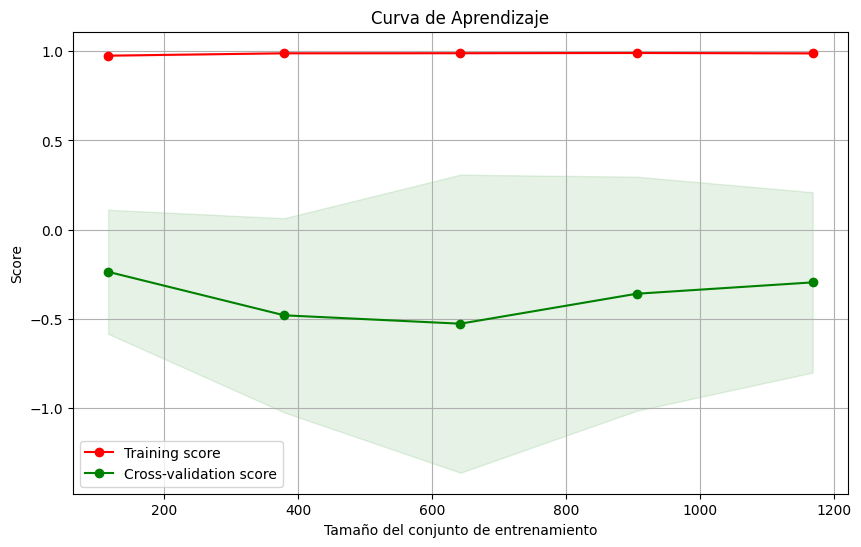

In [26]:
# Crear el gráfico
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Score')
plt.title('Curva de Aprendizaje')
plt.legend(loc="best")
plt.grid()
plt.show()

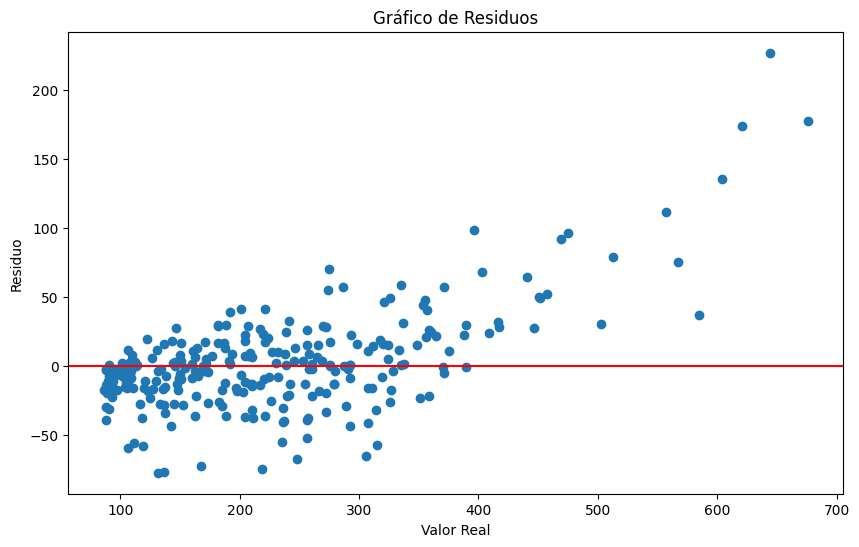

In [27]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

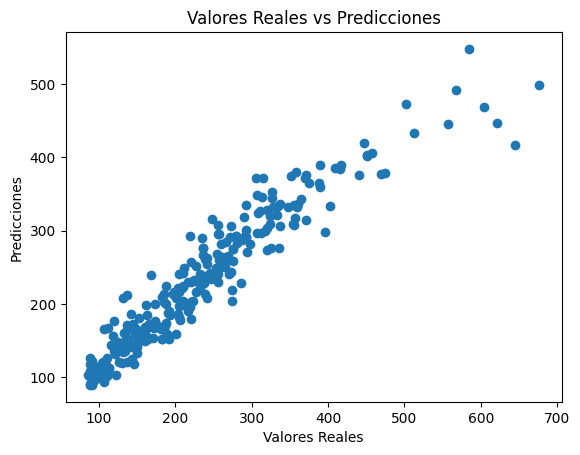

In [28]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

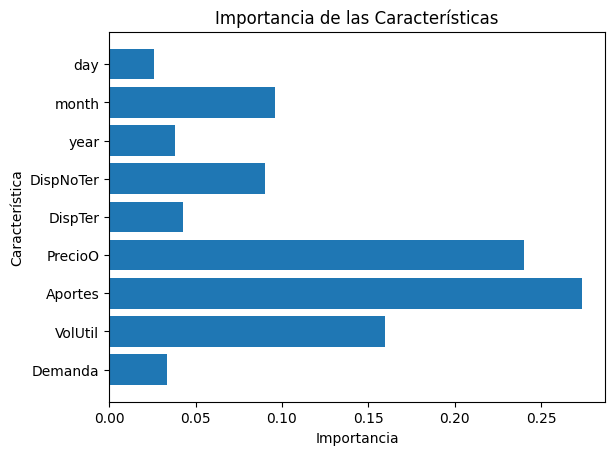

In [29]:
#Importancia de las características: 
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()

In [30]:
#Predicciones entre 2022 a 2024
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time_future = pd.to_datetime('2023-01-01')
end_time_future = pd.to_datetime('2024-02-28')

In [31]:
# Filtra el DataFrame
df_future = df_DataModel[df_DataModel['Date'].between(start_time_future, end_time_future)]

In [32]:
precioB_future = df_future['PrecioB']  # la columna 'PrecioB'

In [33]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 2557 to 2980
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       424 non-null    datetime64[ns]
 1   Demanda    424 non-null    float64       
 2   VolUtil    424 non-null    float64       
 3   Aportes    424 non-null    float64       
 4   PrecioB    424 non-null    float64       
 5   PrecioO    424 non-null    float64       
 6   DispTer    424 non-null    float64       
 7   DispNoTer  424 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 29.8 KB


In [34]:
# Convertir la columna de fecha a múltiples columnas numéricas
df_future['year'] = df_future['Date'].dt.year
df_future['month'] = df_future['Date'].dt.month
df_future['day'] = df_future['Date'].dt.day
df_future = df_future.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_21168\4289330071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['year'] = df_future['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_21168\4289330071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['month'] = df_future['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_21168\4289330071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [35]:
df_future2 = df_future.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'

In [36]:
df_future2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 2557 to 2980
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    424 non-null    float64
 1   VolUtil    424 non-null    float64
 2   Aportes    424 non-null    float64
 3   PrecioO    424 non-null    float64
 4   DispTer    424 non-null    float64
 5   DispNoTer  424 non-null    float64
 6   year       424 non-null    int32  
 7   month      424 non-null    int32  
 8   day        424 non-null    int32  
dtypes: float64(6), int32(3)
memory usage: 28.2 KB


In [37]:
predicciones_futuras = best_model.predict(df_future2)

In [38]:
print(f'Las predicciones de PrecioB para los datos futuros son: {predicciones_futuras}')

Las predicciones de PrecioB para los datos futuros son: [299.33737878 269.32581756 284.89088238 290.86134651 299.10277993
 296.34053378 280.00156931 280.14206193 267.28700229 287.12026011
 263.58219811 272.14098391 272.70015576 265.75103758 280.34556724
 298.68075147 301.64338287 296.79344107 306.30124731 308.28125924
 321.19086482 273.0627706  266.89000104 246.61729164 286.4419288
 314.48366002 304.14554938 305.85305933 323.52647904 405.50554296
 438.06124127 452.61616529 447.01381731 430.77125109 425.85112873
 402.79912713 407.77194982 318.51038364 352.390854   329.73237087
 334.76417647 334.81365629 325.21529836 308.23347407 319.62106384
 294.93421931 304.40213809 318.77857251 311.65352862 301.62274336
 313.18372282 324.27876422 309.2349194  327.15542347 337.03863942
 346.83400429 336.02315118 343.64845993 370.40287849 402.0928236
 401.08104093 374.600428   276.61745758 260.68573316 274.59475464
 281.28348387 273.13181351 259.84930298 261.00355998 266.80947271
 246.12920556 253.2552

In [39]:
# Crear un nuevo DataFrame con las predicciones y las columnas de fecha
df_predicciones = pd.DataFrame({
    'year': df_future['year'],
    'month': df_future['month'],
    'day': df_future['day'],
    'Prediccion_PrecioB': predicciones_futuras
})

In [40]:
print(df_predicciones)

      year  month  day  Prediccion_PrecioB
2557  2023      1    1          299.337379
2558  2023      1    2          269.325818
2559  2023      1    3          284.890882
2560  2023      1    4          290.861347
2561  2023      1    5          299.102780
...    ...    ...  ...                 ...
2976  2024      2   24          449.628814
2977  2024      2   25          390.475879
2978  2024      2   26          450.938315
2979  2024      2   27          443.471323
2980  2024      2   28          506.692107

[424 rows x 4 columns]


In [41]:
precio_real = df_DataModel[df_DataModel['Date'] == '2019-03-2']
print(precio_real)

           Date       Demanda       VolUtil      Aportes    PrecioB  \
1156 2019-03-02  7.841278e+06  8.365556e+09  102977300.0  333.57139   

         PrecioO      DispTer     DispNoTer  
1156  378.917146  4284013.875  9.156821e+06  


In [42]:
# Calcular el RMSE
rmse_future = mean_squared_error(precioB_future, predicciones_futuras, squared=False)
print(f'RMSE: {rmse_future}')

RMSE: 335.9308481597131


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
# Calcular el R^2
r2_future = r2_score(precioB_future, predicciones_futuras)
print(f'R^2: {r2_future}')

R^2: -0.5723876347630514


In [44]:
# Calcular los residuos
residuos_future = precioB_future - predicciones_futuras

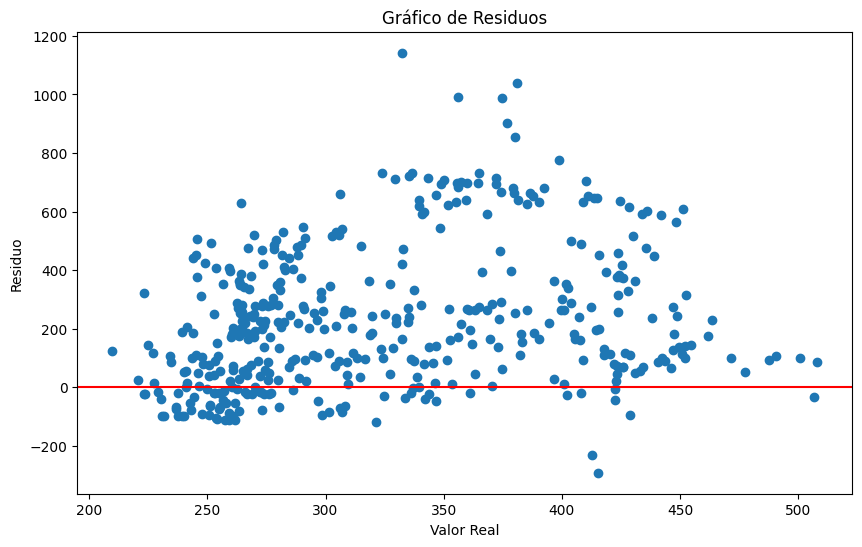

In [45]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(predicciones_futuras, residuos_future)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

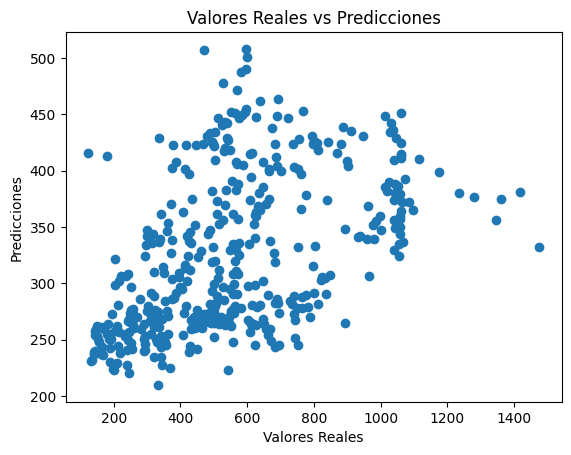

In [46]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(precioB_future, predicciones_futuras)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [47]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 2557 to 2980
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    424 non-null    float64
 1   VolUtil    424 non-null    float64
 2   Aportes    424 non-null    float64
 3   PrecioB    424 non-null    float64
 4   PrecioO    424 non-null    float64
 5   DispTer    424 non-null    float64
 6   DispNoTer  424 non-null    float64
 7   year       424 non-null    int32  
 8   month      424 non-null    int32  
 9   day        424 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 31.5 KB


In [48]:
df_predicciones['Date'] = pd.to_datetime(df_predicciones[['year', 'month', 'day']])
df_predicciones = df_predicciones.drop(['year', 'month', 'day'], axis=1)

In [49]:
df_predicciones.head()

,Prediccion_PrecioB,Date
2557,299.337379,2023-01-01
2558,269.325818,2023-01-02
2559,284.890882,2023-01-03
2560,290.861347,2023-01-04
2561,299.102780,2023-01-05


In [50]:
# Añadir 'precioB_future' al DataFrame
df_predicciones= df_predicciones.assign(PrecioB_future=precioB_future)

In [51]:
df_predicciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 2557 to 2980
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Prediccion_PrecioB  424 non-null    float64       
 1   Date                424 non-null    datetime64[ns]
 2   PrecioB_future      424 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 13.2 KB


In [52]:
df_predicciones.head(10)

,Prediccion_PrecioB,Date,PrecioB_future
2557,299.337379,2023-01-01,499.859663
2558,269.325818,2023-01-02,510.909360
2559,284.890882,2023-01-03,531.093510
2560,290.861347,2023-01-04,556.687833
2561,299.102780,2023-01-05,560.973353
2562,296.340534,2023-01-06,526.727628
2563,280.001569,2023-01-07,503.256190
2564,280.142062,2023-01-08,415.881105
2565,267.287002,2023-01-09,432.687167
2566,287.120260,2023-01-10,382.044767


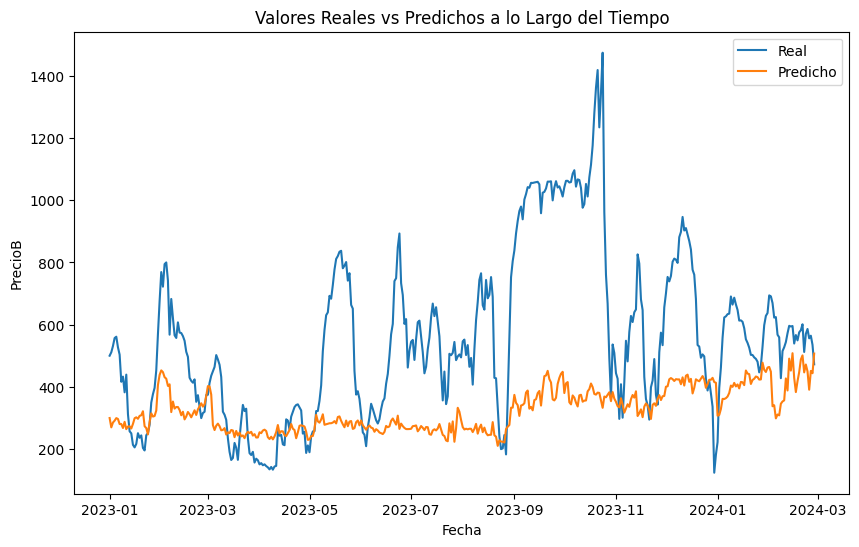

In [53]:
# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_predicciones['Date'], df_predicciones['PrecioB_future'], label='Real')
plt.plot(df_predicciones['Date'], df_predicciones['Prediccion_PrecioB'], label='Predicho')
plt.xlabel('Fecha')
plt.ylabel('PrecioB')
plt.title('Valores Reales vs Predichos a lo Largo del Tiempo')
plt.legend()
plt.show()